# Lab | Cleaning numerical data


#### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

#### Some business Objectives:
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

#### Data Analysis Process
Remember the process:
Case Study
Get data
Cleaning/Wrangling/EDA
Processing Data
Modeling -Validation
Reporting

#### Instructions
1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

## 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. First look at its main features (head, shape, info). 
(NOTE The **target column is total_claim_amount**)

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Overview Observations:

Regarding the dtypes and the general information provided in the output of customer_df.info(), there are several points to highlight:

- Data Types (Dtype): Most of the columns are of type 'object,' which in pandas indicates that they can be text strings or mixtures of different types (e.g., text with numbers). However, some columns like Income, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies are of type 'int64,' indicating that they are integers.

- Numeric Columns: There are columns that clearly contain numeric data (e.g., Customer Lifetime Value, Total Claim Amount) with 'float64' dtype, indicating they are floating-point numbers (real numbers).

- Effective To Date Column: This column should be of 'datetime' type and not 'object' since it represents dates. This will make any operations involving dates later on (such as sorting, calculating time spans, etc.) easier.

- No Null Values: According to the provided information, there are no null values (NaN) in any of the columns. However, this doesn't rule out the possibility of there being values representing nulls in some other form, like empty strings or markers such as "?".

- Consistency in Column Names: To follow the PE8 standard (PEP 8 for Python, assuming it refers to variable and column naming conventions), the column names should be renamed to use snake_case instead of having spaces and capital letters. This involves replacing spaces with underscores (_) and converting all letters to lowercase.

In summary, it is necessary to change the data type of the 'Effective To Date' column to datetime. Additionally, it would be advisable to standardize column names to adhere to code style conventions.

In [7]:
# Convert 'Effective To Date' column to datetime

customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

# Check the conversion

customer_df["Effective To Date"].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective To Date, dtype: datetime64[ns]

## 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
customer_df.columns = [column.lower().replace(" ", "_") for column in customer_df.columns]

In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 5. Change effective to date column to datetime format.

In [10]:
# Already done in cell 7

## 6. Create a NEW dataframe using only the numerical data called numerical_df.

In [11]:
numerical_df = customer_df.select_dtypes(include=[np.number])
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## 7. Define a function that differentiates between continuous and discrete variables. 

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [12]:
"""
    Separates columns of a DataFrame into continuous and discrete variables based on the number of unique values.

    Parameters:
    -----------
    df : DataFrame
        The input DataFrame containing numerical variables.

    Returns:
    --------
    continuous_df : DataFrame
        DataFrame containing columns with a high number of unique values (continuous variables).
    discrete_df : DataFrame
        DataFrame containing columns with a limited number of unique values (discrete variables).

"""

def differentiate_variables(df):
    
    continuous_vars = df.columns[df.nunique() > 10]
    discrete_vars = df.columns[df.nunique() <= 10]
    
    return df[continuous_vars], df[discrete_vars]

In [13]:
# Apply the function

continuous_df, discrete_df = differentiate_variables(numerical_df)

In [14]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [15]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


## 8. Plot a correlation matrix, comment what you see.

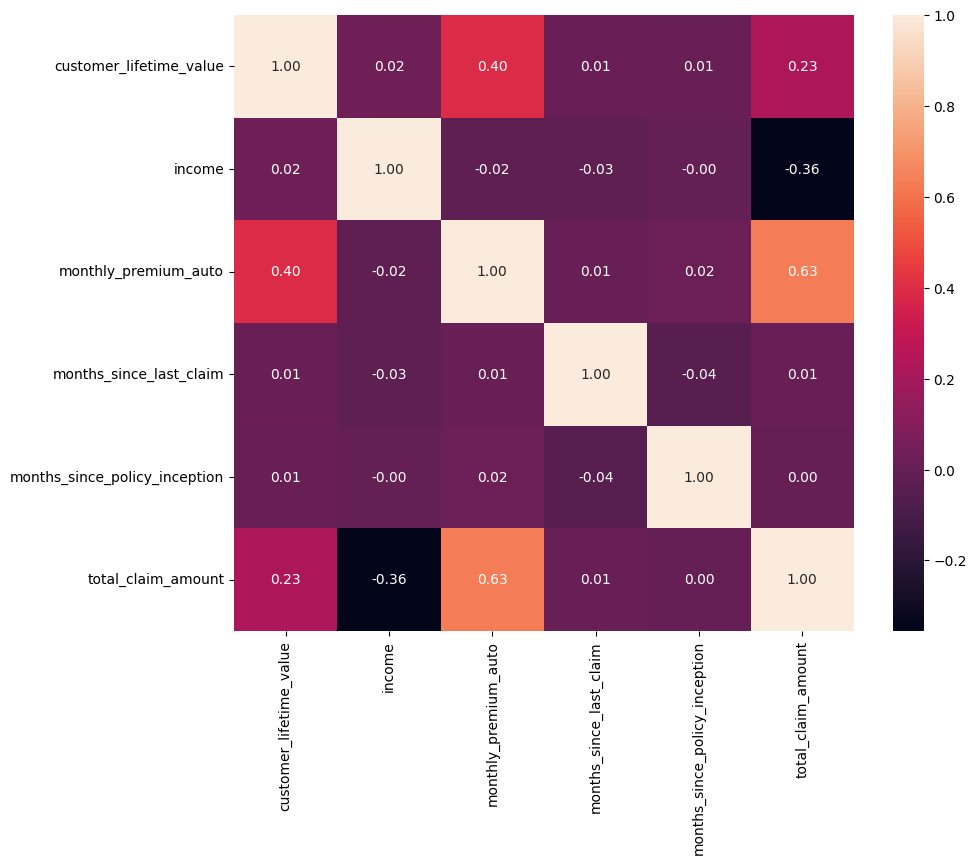

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(continuous_df.corr(), annot=True, fmt='.2f')
plt.show()

### Overview Observations:

**1. monthly_premium_auto AND total_claim_amount:** There is a moderate positive correlation (0.63) indicating that as monthly_premium_auto increases, the total_claim_amount tends to increase as well.

**2. customer_lifetime_value AND monthly_premium_auto:** A weaker positive correlation (0.40) is observed, suggesting customers with a higher lifetime value may also have higher monthly premiums, though this relationship isn't particularly strong.

**3. total_claim_amount AND income:** A moderate negative correlation (-0.36) is present, which could imply that as income increases, the total claim amount tends to decrease. This might indicate that those with higher income may have fewer or lesser value claims.

**4. Low Correlations:** Most of the other variables show very low correlations with each other (close to 0), indicating there is no strong linear relationship between these variables.

**There don't appear to be clear indications of multicollinearity among this variables.**

## 9. Create a function to plot every discrete variable. Do the same with the continuous variables.
(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [17]:
def plot_discrete(df):
    for column in df.columns:
        sns.countplot(x=df[column], palette="Set3")
        plt.xticks(rotation=90)  
        plt.show()

def plot_continuous(df):
    for column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.show()

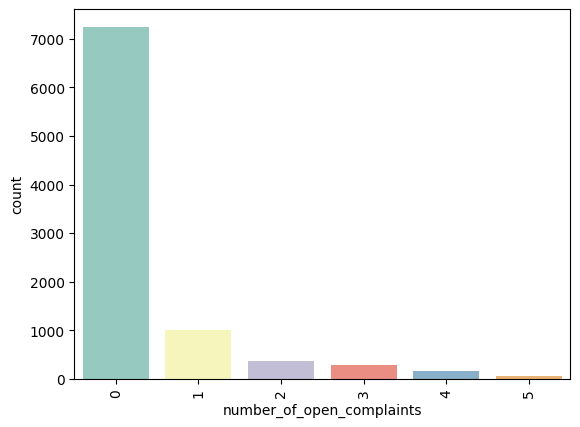

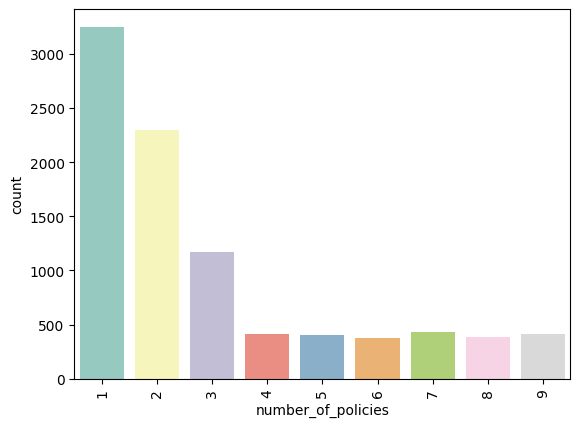

In [18]:
# Apply function for discrete values

plot_discrete(discrete_df)

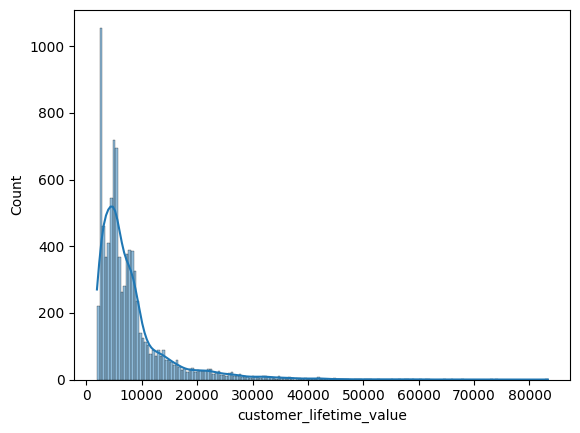

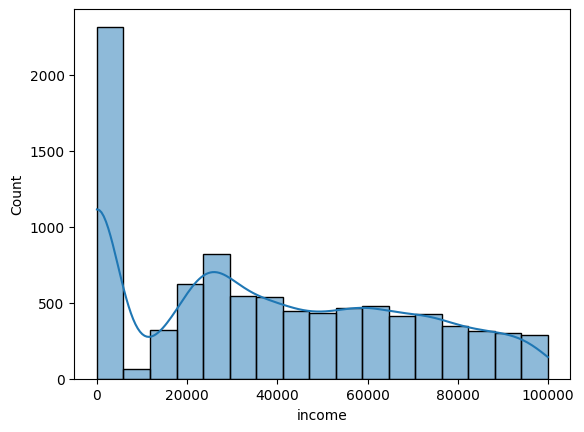

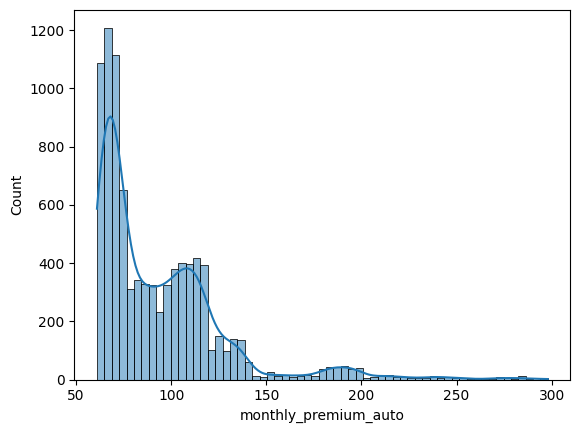

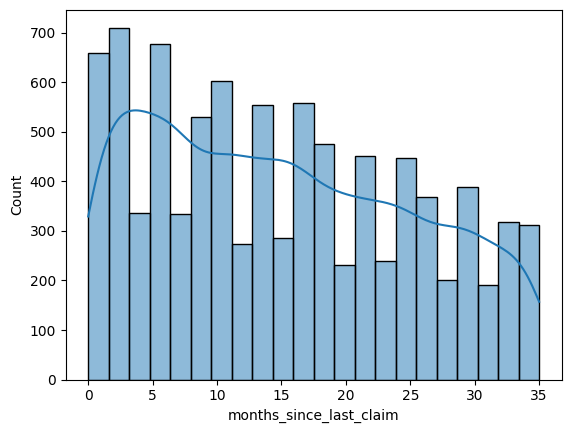

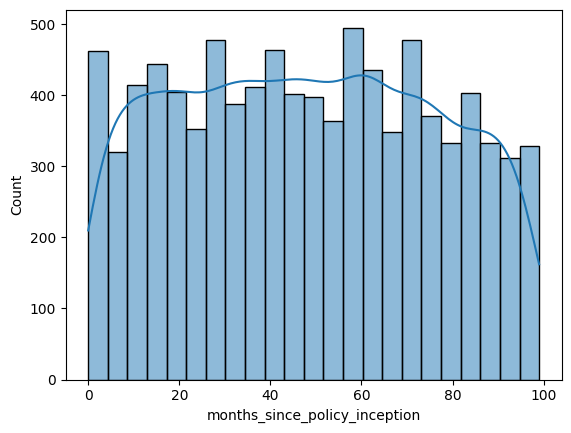

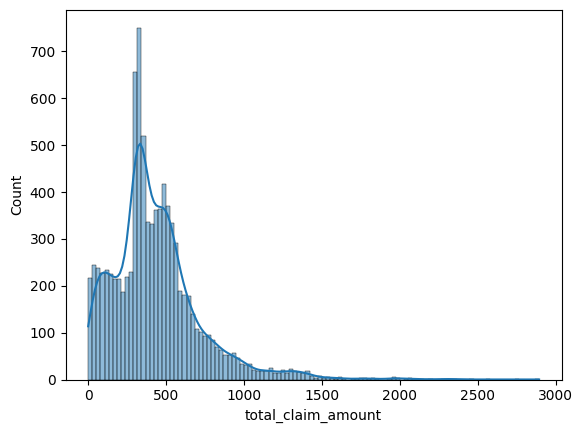

In [19]:
# Apply function for continuous values

plot_continuous(continuous_df)

## 10. Comment what you can see in the plots.

### Discrete plots:

**1. Number of Open Complaints:** This discrete bar chart shows that the vast majority of records have 0 open complaints, suggesting that customers generally do not have ongoing issues.

**2. Number of Policies:** Another discrete distribution where most customers appear to have only 1 policy, with progressively fewer customers having 2 or more policies.

### Continuous plots:

**1. Customer Lifetime Value:** This histogram indicates that the customer lifetime value is right-skewed, with most customers having a lower lifetime value and a few customers having a very high lifetime value.

**2. Income:** Here we have a right-skewed distribution similar to the customer lifetime value, with a peak at the lower income range and a long tail toward the higher income range. The spike at 0 could indicate a large number of customers with no income recorded or possibly unemployed customers.

**3. Monthly Premium Auto:** This plot shows that the monthly auto premium is positively skewed, with most of the premiums clustered at the lower end and some premiums extending to a much higher range.

**4. Months Since Last Claim:** This histogram is more uniformly distributed, suggesting that the time since the last claim is spread out more evenly across the customers, with slight peaks around 10 and 20 months.

**5. Months Since Policy Inception:** The distribution is quite uniform, indicating that the dataset includes a wide range of customers, from new to long-term clients, without obvious clustering at specific time periods.

**6. Total Claim Amount:** This is another right-skewed distribution. Most claims are of lower amount, with a few claims that are much higher in comparison.

#### In resume:

None of the variables appear to follow a typical normal distribution. All of them exhibit some degree of right-skewness, and in the case of income, there is also a concentration of low values. Therefore, if we intend to use these variables in statistical analyses or models that assume normality, we may need to perform data transformations to achieve a better approximation to normality.

- Additionally, the concentration of customers with zero open complaints and only one policy could influence decisions related to customer service and marketing strategies.

## 11. Look for outliers in the continuous variables. 
(HINT: There’s a good plot to do that!)

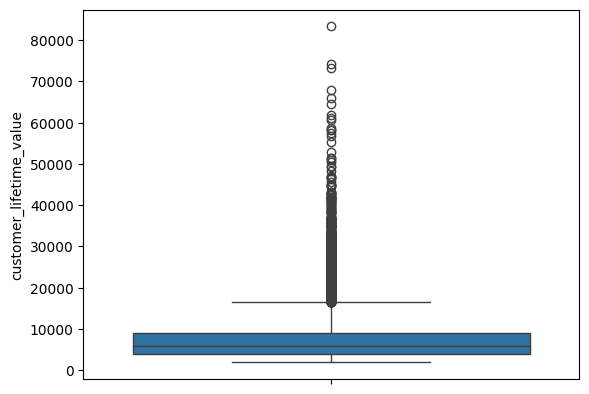

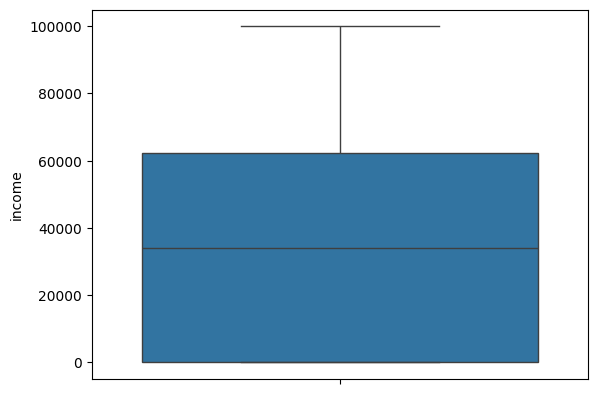

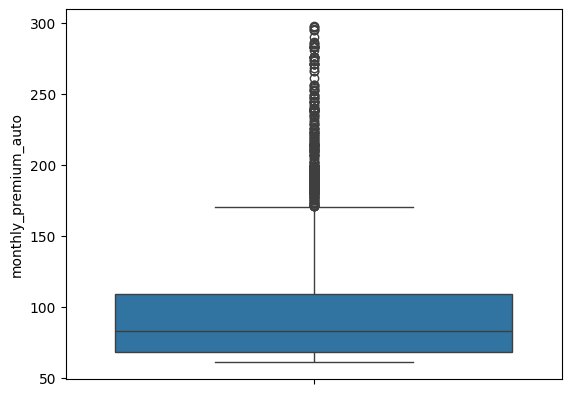

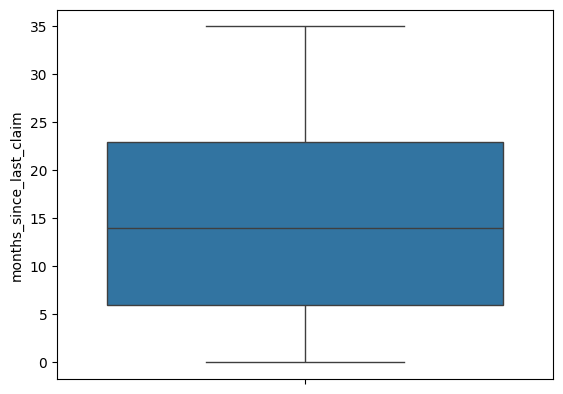

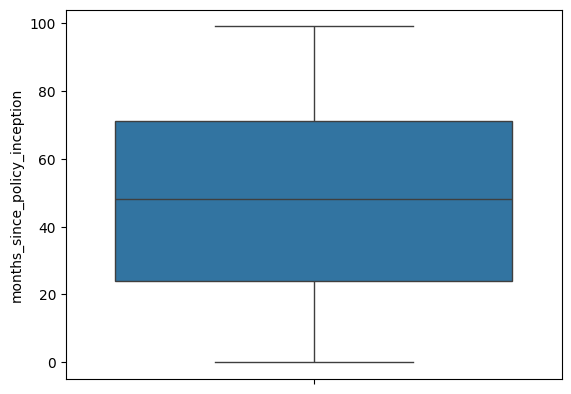

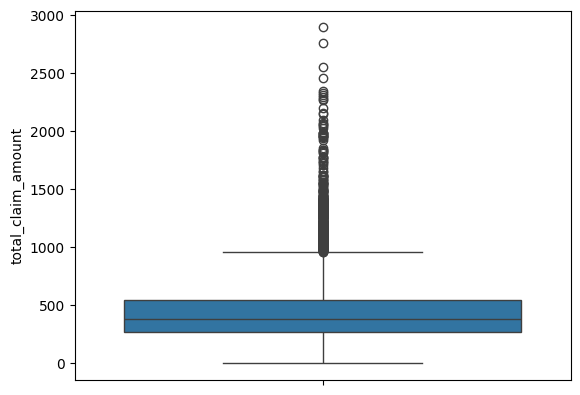

In [20]:
for column in continuous_df.columns:
    sns.boxplot(y=continuous_df[column], orient="horizontal")
    plt.show()

### Overview Observations:

#### Boxplot 1 (customer_lifetime_value)

- There are a **significant number of outliers** represented as individual points above the upper "whisker" of the boxplot.
- The line inside the box represents the median of the data, which appears to be near the lower edge of the box, indicating **data skewing towards higher values**.
- The box itself shows the interquartile range (IQR), which seems relatively small compared to the total range, indicating that **most values cluster near the median**.

#### Boxplot 2 (income)

- This boxplot displays **very little variability and does not seem to have any apparent outliers**.
- The median is at the center of the box, suggesting a **symmetric distribution** of data around the median.

#### Boxplot 3 (monthly_premium_auto)

- It shows **outliers**. 
- **Skewed median**. The median is not in the center of the box but closer to the lower edge. This doesn't mean it's skewed towards higher values but rather the opposite: it suggests a higher concentration of data lies in the lower range (below the median). In other words, there are more data points clustered below the median than above it.

#### Boxplot 4 (months_since_last_claim)

- This boxplot shows a situation similar to the two preceding ones, with **limited variability and no apparent outliers**.
- The median is centered, indicating a **symmetric distribution**.

#### Boxplot 5 (months_since_policy_inception)

- This plot displays a **distribution with slightly wider variability** than the previous boxplots.
- There are **no visible outliers**, and the **median is centered**.

#### Boxplot 6 (total_claim_amount)

- This boxplot is **the most varied of all**, with a **large number of outliers** extending above the upper whisker.
- The median is near the lower edge of the box, indicating a **skew towards higher values**.

## 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

**Yes**, I found outliers in the following variables:

- customer_lifetime_value
- monthly_premium_auto
- total_claim_amount

From the distribution and box plot we can infer that:

- Customer Lifetime Value is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.
- Monthly Premium Auto is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.
- Total Claim Amount seems to have an abnormal distribution, the distribution is skew right, one value looks very high. The Boxplot show there are many outliers.

**While evaluating potential outliers to remove from the dataset, we should consider the following:**

- Is the outlier a measurement error or data entry error? If so, correct it manually where possible. If it’s unable to be corrected, it should be considered incorrect, and thus legitimately removed from the dataset.
- Is the outlier a natural part of the data population being analyzed? If not, we should remove it.
- Can we explain our reasoning for removing an outlier? If not, we should not remove it. When removing outliers, we should provide documentation of the excluded data points, giving reasoning for our choices.

**We will eventually want to get rid of the them to get a normal distribution of the variables for machine learning.**

In [21]:
numerical_df.shape

(9134, 8)

In [22]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


### Logarithmic transformation to features

#### customer_lifetime_value

In [23]:
# Logarithmic transformation to reduce the influence of extreme values and biases in positive data.
# Also for more readable data
# This function performs a logarithmic transformation for positive values and returns NaN for invalid (non-positive)
# values to prevent mathematical issues. 

def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

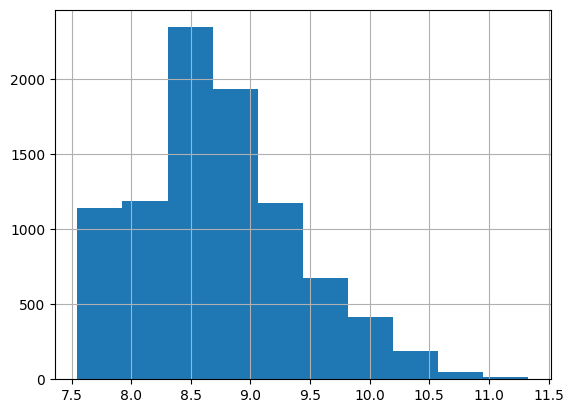

In [24]:
pd.Series(numerical_df['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()

In [25]:
numerical_df["customer_lifetime_value_transformed"] = numerical_df["customer_lifetime_value"].apply(log_transfom_clean)
numerical_df["customer_lifetime_value_transformed"].head()

0    7.924260
1    8.850738
2    9.464008
3    8.941920
4    7.942253
Name: customer_lifetime_value_transformed, dtype: float64

In [26]:
numerical_df["customer_lifetime_value_transformed"].mean()

8.748561782441605

In [27]:
numerical_df["customer_lifetime_value_transformed"].median()

8.662190483141934

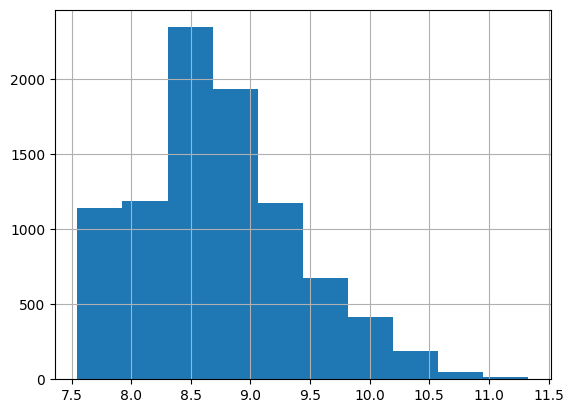

In [28]:
numerical_df['customer_lifetime_value_transformed'] = numerical_df['customer_lifetime_value_transformed'].fillna(np.median(numerical_df['customer_lifetime_value_transformed']))
numerical_df['customer_lifetime_value_transformed'].hist()
plt.show()

In [29]:
numerical_df['customer_lifetime_value_transformed'].value_counts(dropna=False)

8.881929    6
9.769815    6
7.717996    6
8.998740    6
8.708982    6
           ..
9.122827    1
7.772394    1
8.835625    1
9.203806    1
7.867809    1
Name: customer_lifetime_value_transformed, Length: 8041, dtype: int64

In [30]:
np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75)

9.100767326620565

In [31]:
numerical_df["customer_lifetime_value_transformed"].describe().T

count    9134.000000
mean        8.748562
std         0.652919
min         7.548560
25%         8.292612
50%         8.662190
75%         9.100767
max        11.330508
Name: customer_lifetime_value_transformed, dtype: float64

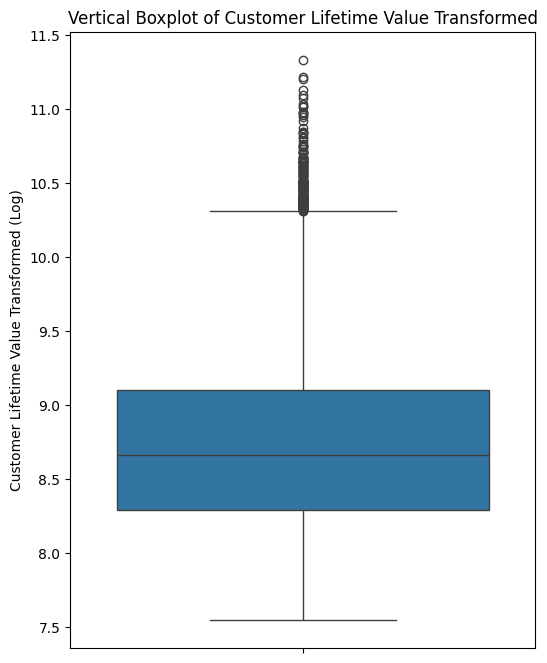

In [32]:
plt.figure(figsize=(6, 8))  
sns.boxplot(y='customer_lifetime_value_transformed', data=numerical_df, orient='v')
plt.ylabel('Customer Lifetime Value Transformed (Log)')
plt.title('Vertical Boxplot of Customer Lifetime Value Transformed')
plt.show()

#### monthly_premium_auto

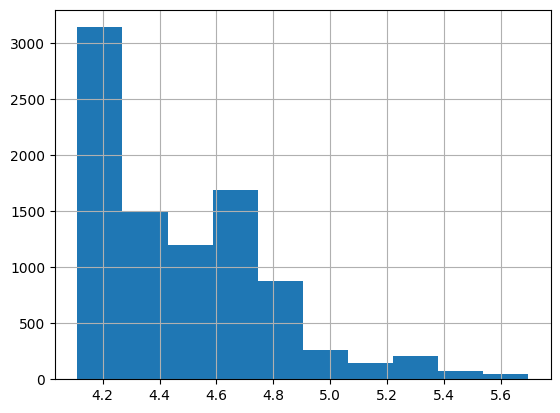

In [33]:
pd.Series(numerical_df['monthly_premium_auto'].apply(log_transfom_clean)).hist()
plt.show()

In [34]:
numerical_df["monthly_premium_auto_transformed"] = numerical_df["monthly_premium_auto"].apply(log_transfom_clean)
numerical_df["monthly_premium_auto_transformed"].head()

0    4.234107
1    4.543295
2    4.682131
3    4.663439
4    4.290459
Name: monthly_premium_auto_transformed, dtype: float64

In [35]:
numerical_df["monthly_premium_auto_transformed"].mean()

4.482330324373687

In [36]:
numerical_df["monthly_premium_auto_transformed"].median()

4.418840607796598

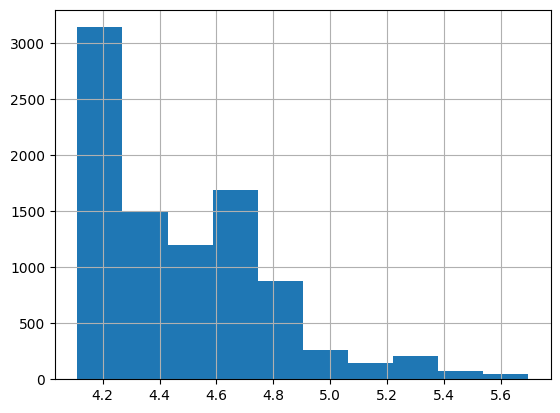

In [37]:
numerical_df['monthly_premium_auto_transformed'] = numerical_df['monthly_premium_auto_transformed'].fillna(np.median(numerical_df['monthly_premium_auto_transformed']))
numerical_df['monthly_premium_auto_transformed'].hist()
plt.show()

In [38]:
numerical_df['monthly_premium_auto_transformed'].value_counts(dropna=False)

4.174387    348
4.189655    307
4.262680    304
4.290459    302
4.143135    289
           ... 
5.609472      1
5.659482      1
5.590987      1
5.446737      1
5.655992      1
Name: monthly_premium_auto_transformed, Length: 202, dtype: int64

In [39]:
np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75)

4.6913478822291435

In [40]:
numerical_df["monthly_premium_auto_transformed"].describe().T

count    9134.000000
mean        4.482330
std         0.308007
min         4.110874
25%         4.219508
50%         4.418841
75%         4.691348
max         5.697093
Name: monthly_premium_auto_transformed, dtype: float64

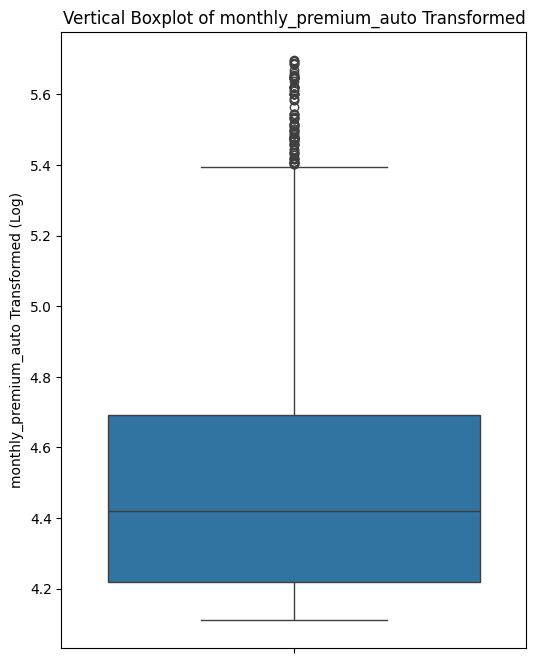

In [41]:
plt.figure(figsize=(6, 8))  
sns.boxplot(y='monthly_premium_auto_transformed', data=numerical_df, orient='v')
plt.ylabel('monthly_premium_auto Transformed (Log)')
plt.title('Vertical Boxplot of monthly_premium_auto Transformed')
plt.show()

### Handle Outliers

In [42]:
# Checking how many values will be removed if the outliers are removed from customer lifetime value

iqr = np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75) - np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],25)
upper_limit = np.nanpercentile(numerical_df['customer_lifetime_value_transformed'],75) + 1.5*iqr
print(upper_limit)
print(iqr)

10.313001003057334
0.8081557842911788


In [43]:
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value_transformed'] > upper_limit]
rows = len(extraordinary_points)  # This checks the number of points that will be removed

In [44]:
# Checking how many values will be removed if the outliers are removed from monthly premium auto

iqr2 = np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75) - np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],25)
upper_limit2 = np.nanpercentile(numerical_df['monthly_premium_auto_transformed'],75) + 1.5*iqr2
print(upper_limit2)
print(iqr2)

5.399108147808699
0.4718401770530365


In [45]:
extraordinary_points2 = numerical_df[numerical_df['monthly_premium_auto'] > upper_limit2]
rows2 = len(extraordinary_points2)  

In [46]:
# If we remove outliers we will remove this amount of rows

print("Rows that will be removed from CLV if we drop outliers using an upper limit:", rows)
print("Rows that will be removed from MPA if we drop outliers using an upper limit:", rows2)

Rows that will be removed from CLV if we drop outliers using an upper limit: 185
Rows that will be removed from MPA if we drop outliers using an upper limit: 9134


In [47]:
# It's a lot of data that we will lost if we do so
# So we don't have to lose so much data, we establish an other limit for what is considered an outlier

In [48]:
extraordinary_points = numerical_df[numerical_df['customer_lifetime_value_transformed'] > 11]
rows_1 = len(extraordinary_points)

In [49]:
extraordinary_points2 = numerical_df[numerical_df['monthly_premium_auto_transformed'] > 5.5]
rows_2 = len(extraordinary_points2)  

In [50]:
print("Rows that will be removed from CLV:", rows_1)
print("Rows that will be removed from MPA:", rows_2)

Rows that will be removed from CLV: 9
Rows that will be removed from MPA: 57


### I have reviewed several options for removing the outliers, but I've noticed that we lose a lot of data, and I don't have a complete understanding of all the information to determine if it's appropriate to delete them. So, I decide to continue with them.

## 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [51]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

**We don't have NaN values.**

## 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [52]:
numerical_df.to_csv('numerical.csv', index=False)